In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout

In [2]:
df = pd.read_csv('IMDB Dataset.csv')
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

In [4]:
vocab_size = 10000
max_length = 300

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

In [5]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\neils\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [6]:
model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6626 - loss: 0.5833 - val_accuracy: 0.8695 - val_loss: 0.3246
Epoch 2/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8687 - loss: 0.3210 - val_accuracy: 0.8720 - val_loss: 0.3022
Epoch 3/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9010 - loss: 0.2551 - val_accuracy: 0.8790 - val_loss: 0.2971
Epoch 4/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9135 - loss: 0.2268 - val_accuracy: 0.8740 - val_loss: 0.3193
Epoch 5/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9188 - loss: 0.2139 - val_accuracy: 0.8910 - val_loss: 0.2839


In [7]:
loss, accuracy = model.evaluate(X_test_pad, y_test)
print("Test Accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8917 - loss: 0.2735
Test Accuracy: 0.8880000114440918


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


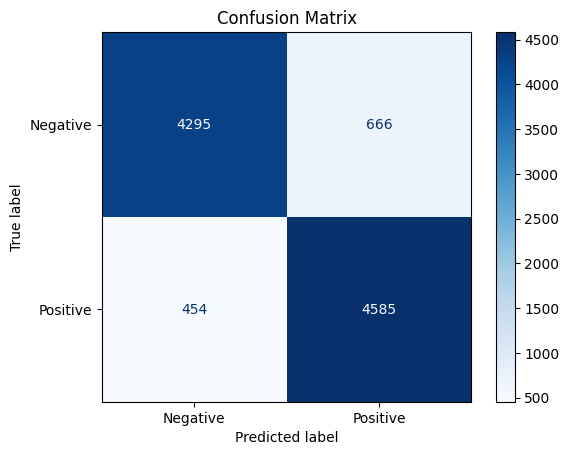

In [8]:
y_pred = model.predict(X_test_pad)
y_pred_class = (y_pred > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [9]:
def predict_sentiment(review_text):
    seq = tokenizer.texts_to_sequences([review_text])
    pad = pad_sequences(seq, maxlen=max_length, padding='post', truncating='post')
    pred = model.predict(pad)[0][0]
    sentiment = "Positive" if pred > 0.5 else "Negative"
    return f"Predicted Sentiment: {sentiment} (Confidence: {pred:.2f})"

In [10]:
print(predict_sentiment(df['review'][90]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Sentiment: Positive (Confidence: 0.99)
